In [34]:
import pandas as pd
import seaborn as sns

final_data = pd.read_csv('final_data.csv')
final_data.head()

/var/folders/v_/6kykbhq56dvb0f0j3gn3qbzm0000gn/T/ipykernel_13058/1494999451.py:4: DtypeWarning: Columns (78,83,84,89) have mixed types. Specify dtype option on import or set low_memory=False.
  final_data = pd.read_csv('final_data.csv')


,WINNER_ID,WINNER_NAME,LOSER_ID,LOSER_NAME,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,...,w_helo,w_celo,w_gelo,w_player_key,l_player,l_elo,l_helo,l_celo,l_gelo,l_player_key
0,101797,Jacco Eltingh,101120,Karel Novacek,-1266.0,102.0,-5.4,-2.0,3,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101205,Grant Connell,101767,Lars Jonsson,84.0,-23.0,4.6,-3.0,3,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101368,Christian Miniussi,102536,James Greenhalgh,433.0,-977.0,7.7,2.0,3,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100772,Kelly Evernden,101746,Renzo Furlan,-406.0,119.0,8.6,0.0,3,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101532,Francisco Clavet,101119,Marian Vajda,454.0,-69.0,-3.5,10.0,3,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
final_data.columns

Index(['WINNER_ID', 'WINNER_NAME', 'LOSER_ID', 'LOSER_NAME', 'ATP_POINT_DIFF',
       'ATP_RANK_DIFF', 'AGE_DIFF', 'HEIGHT_DIFF', 'BEST_OF', 'DRAW_SIZE',
       'H2H_DIFF', 'H2H_SURFACE_DIFF', 'P_ACE_LAST_3_DIFF', 'P_DF_LAST_3_DIFF',
       'P_1ST_IN_LAST_3_DIFF', 'P_1ST_WON_LAST_3_DIFF',
       'P_2ND_WON_LAST_3_DIFF', 'P_BP_SAVED_LAST_3_DIFF', 'P_ACE_LAST_5_DIFF',
       'P_DF_LAST_5_DIFF', 'P_1ST_IN_LAST_5_DIFF', 'P_1ST_WON_LAST_5_DIFF',
       'P_2ND_WON_LAST_5_DIFF', 'P_BP_SAVED_LAST_5_DIFF', 'P_ACE_LAST_10_DIFF',
       'P_DF_LAST_10_DIFF', 'P_1ST_IN_LAST_10_DIFF', 'P_1ST_WON_LAST_10_DIFF',
       'P_2ND_WON_LAST_10_DIFF', 'P_BP_SAVED_LAST_10_DIFF',
       'P_ACE_LAST_20_DIFF', 'P_DF_LAST_20_DIFF', 'P_1ST_IN_LAST_20_DIFF',
       'P_1ST_WON_LAST_20_DIFF', 'P_2ND_WON_LAST_20_DIFF',
       'P_BP_SAVED_LAST_20_DIFF', 'P_ACE_LAST_50_DIFF', 'P_DF_LAST_50_DIFF',
       'P_1ST_IN_LAST_50_DIFF', 'P_1ST_WON_LAST_50_DIFF',
       'P_2ND_WON_LAST_50_DIFF', 'P_BP_SAVED_LAST_50_DIFF',
       

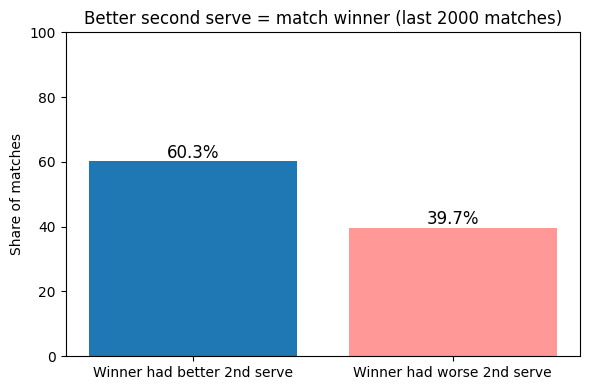

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

col = "P_2ND_WON_LAST_2000_DIFF"
series = pd.read_csv("final_data.csv", usecols=[col])[col].dropna()

shares = (
    pd.Series(series > 0, name="WinnerHadEdge")
      .value_counts(normalize=True)
      .reindex([True, False])
      .fillna(0)
      * 100
)

labels = ["Winner had better 2nd serve", "Winner had worse 2nd serve"]
colors = ["#1f77b4", "#ff9896"]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, shares.values, color=colors)
for bar, val in zip(bars, shares.values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 1, f"{val:.1f}%", ha="center", fontsize=12)

plt.ylabel("Share of matches")
plt.title("Better second serve = match winner (last 2000 matches)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [37]:
import numpy as np
import pandas as pd

# 1. Load data and prep features/labels
df = pd.read_csv("final_data.csv", low_memory=False)
df = df.dropna(subset=["surface"]).reset_index(drop=True)

drop_cols = [
    "surface", "WINNER_NAME", "LOSER_NAME",
    "WINNER_KEY", "LOSER_KEY", "w_player", "w_player_key",
    "l_player", "l_player_key"
]
feature_cols = [c for c in df.columns if c not in drop_cols]

X = df[feature_cols].apply(pd.to_numeric, errors="coerce")
X = X.fillna(X.median())                        # crude imputation
y = df["surface"].values

# 2. Train/test split (manual because sklearn isn't available)
rng = np.random.default_rng(42)
idx = rng.permutation(len(X))
train_size = int(0.7 * len(X))
train_idx, test_idx = idx[:train_size], idx[train_size:]

X_train, X_test = X.values[train_idx], X.values[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
classes = np.unique(y_train)

# 3. Fit Gaussian Naïve Bayes
means = {c: X_train[y_train == c].mean(axis=0) for c in classes}
vars_ = {c: X_train[y_train == c].var(axis=0) + 1e-6 for c in classes}
priors = {c: (y_train == c).mean() for c in classes}

def predict_naive_bayes(Xb):
    """Return class predictions for batch Xb."""
    log_probs = []
    for c in classes:
        mean = means[c]
        var = vars_[c]
        lp = -0.5 * np.sum(
            np.log(2 * np.pi * var) + ((Xb - mean) ** 2) / var,
            axis=1,
        ) + np.log(priors[c])
        log_probs.append(lp)
    log_probs = np.vstack(log_probs)
    return classes[np.argmax(log_probs, axis=0)]

# 4. Evaluate
y_pred = predict_naive_bayes(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.3f}")

conf_matrix = pd.crosstab(
    pd.Series(y_test, name="Actual"),
    pd.Series(y_pred, name="Pred")
)
print("Confusion matrix:\n", conf_matrix)


Accuracy: 0.227
Confusion matrix:
 Pred    Carpet  Clay  Grass  Hard
Actual                           
Carpet    1514     4     26    12
Clay      5869   325   1319  1642
Grass     1262    88   1084   460
Hard      7587   414   2725  3369
